In [1]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
setwd("D://LA//ATI Data//Summaries//Just_Auth")

In [3]:
df<- read.table(file="LA.txt", header=T, sep=",")
df<- df[,-1]

In [4]:
head(df)
dim(df)
str(df)

UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount
User035855,Comp808475,Comp081330,TGS,0,17
Comp655251$,Comp655251,ActiveDirectory,NetworkLogon,0,350
User762066,Comp306129,ActiveDirectory,TGS,0,22
User384215,Comp095190,EnterpriseAppServer,NetworkLogon,0,35
User043263,Comp883307,Comp384394,TGS,0,2
User631552,Comp621781,Comp915658,NetworkLogon,0,1


[1] 15953681        6

'data.frame':	15953681 obs. of  6 variables:
 $ UserName  : Factor w/ 28815 levels "ActiveDirectory$",..: 14620 9072 25183 19773 14720 23274 24008 18253 20734 26445 ...
 $ SrcDevice : Factor w/ 18199 levels "ActiveDirectory",..: 14570 11742 5501 1692 15973 11133 16507 16592 9631 1739 ...
 $ DstDevice : Factor w/ 14000 levels "ActiveDirectory",..: 1145 1 1 13999 5317 12798 9069 12802 1 1 ...
 $ AuthType  : Factor w/ 13 levels "Batch","CachedInteractive",..: 10 5 10 5 10 5 5 10 11 11 ...
 $ Failure   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DailyCount: int  17 350 22 35 2 1 14 78 2 4 ...


In [5]:
df %>% mutate(across(where(is.factor), as.character)) -> df

In [6]:
UN <- read.table(file="UserNames.txt", header=F)
UN <- as.vector(UN[,1])

In [7]:
head(UN)
class(UN)
length(UN)

[1] "User024511" "User063197" "User203147" "User365588" "User409683"
[6] "User538831"

[1] "character"

[1] 99

In [8]:
Mal <- df[df$UserName%in%UN, ]

In [9]:
head(Mal)
dim(Mal)

,UserName,SrcDevice,DstDevice,AuthType,Failure,DailyCount
129,AppService,EnterpriseAppServer,Comp947445,TGS,0,2
468,User871458,Comp273168,Comp273168,TGS,0,6
584,User882755,Comp599337,ActiveDirectory,TGS,0,51
764,User718825,Comp544870,Comp370444,NetworkLogon,0,25
903,User538831,Comp277798,None,WorkstationLock,0,1
1018,AppService,Comp894088,Comp698972,NetworkLogon,0,110063


[1] 151819      6

[1] "There are 95 unique usernames."

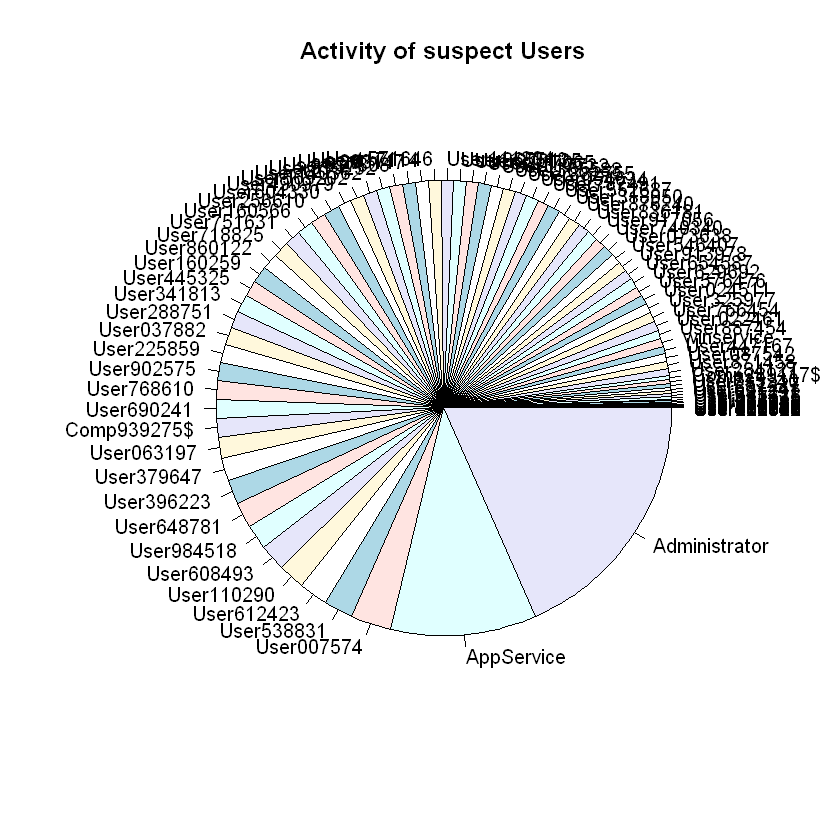

In [56]:
pie(table(Mal$UserName)[order(table(Mal$UserName), decreasing=F)], main="Activity of suspect Users")
paste0("There are ", length(unique(Mal$UserName)), " unique usernames.")

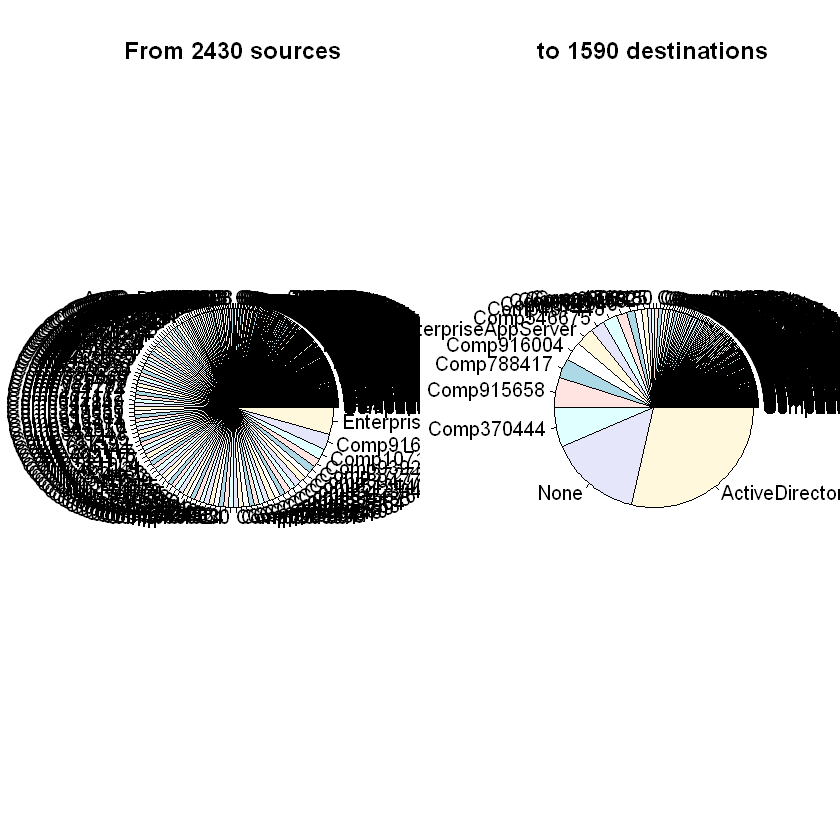

In [38]:
op <- par(mfrow=c(1,2))
pie(table(Mal$SrcDevice)[order(table(Mal$SrcDevice), decreasing=FALSE)], main=paste("From", length(unique(Mal$SrcDevice)), "sources", sep=" "))
pie(table(Mal$DstDevice)[order(table(Mal$DstDevice), decreasing=FALSE)], main=paste("to", length(unique(Mal$DstDevice)), "destinations", sep=" "))
par(op)

In [10]:
PartMean <- function(x=df$UserName) {
    
    n <- readline(prompt="Would you like to run the threshold algorithm T, or the automated version A? Input T or A: ")
    if(n=='T') {
        n<- readline(prompt="Input threshold. We recommend a value around 800, though 500 - 1000 is a sensible range:")
        n<- as.numeric(n)
        i<- 1
        t<- table(x)
        T<- length(t)/n
        len<- vector()
        med <- vector()
        while(length(t)>T) {
            len[i]<- length(t)
            m<- mean(t)
            med[i] <- m
            i<- 1+i
            t<- t[t>m]
            }

        len <- c(len, 0)
        med <- round(med)
        print("The partition lengths are:")
        print(len)
        print("The partitions have corresponding means:")
        print(med)
        print(t[order(t, decreasing=TRUE)])
    
        if(length(t)<=2 & length(t)>=1) {
            print("Potential outlier detected.")
            }
        }
    if(n=='A') { 
        t<- table(x)
        c<- 1
        while(length(t)>=2) {
        m<- mean(t)
        f<- t[t>m]
        f<- f[order(f, decreasing=FALSE)]
        t<- f
        print(paste0("Partition ", c))
        cat('\n')
        c<- 1+c
        if(length(f)>=7) {
            p<- paste(names(f[1]), names(f[2]), names(f[3]), names(f[4]), names(f[5]) , sep=" ")
            # print(p)
            print(paste(p, "and", (length(f)-5), "others", sep=" "))  
            cat("\n")      }
        if(length(f)<7)
          { print(f) 
              cat("\n")    }
            }
    
    
        }
    if(n!='A' & n!='T') {
        print("Unrecognized input.")
        stop()
        }
    }

In [11]:
PartMean()

Would you like to run the threshold algorithm T, or the automated version A? Input T or A: A
[1] "Partition 1"

[1] "Comp039053$ Comp044095$ Comp053112$ Comp076777$ Comp078004$ and 10373 others"

[1] "Partition 2"

[1] "User545165 User963380 Comp352050$ User141270 User142464 and 3738 others"

[1] "Partition 3"

[1] "User738085 User884998 User979892 User047514 User140862 and 755 others"

[1] "Partition 4"

[1] "User449100 User619750 User181140 User765669 User624654 and 64 others"

[1] "Partition 5"

x
   User272607    AppService Administrator       Scanner     Anonymous 
        15767         15791         27928        189928        472595 

[1] "Partition 6"

x
  Scanner Anonymous 
   189928    472595 

[1] "Partition 7"

Anonymous 
   472595 



In [19]:
p<- paste0("A", 10)
p
df10<- read.table(file=paste0(p, ".txt"), header=F, sep=",")

[1] "A10"

In [20]:
head(df10)

V1,V2,V3,V4,V5,V6
User035855,Comp808475,Comp081330,TGS,0,10
Comp655251$,Comp655251,ActiveDirectory,NetworkLogon,0,337
User762066,Comp306129,ActiveDirectory,TGS,0,90
User384215,Comp095190,EnterpriseAppServer,NetworkLogon,0,60
Comp940295$,Comp940295,Comp370444,TGS,0,1
User043263,Comp883307,Comp384394,TGS,0,2


In [23]:
n<- vector()
for(i in 1:90) {
    df1 <- read.table(file=paste0("A", i, ".txt"), header=F, sep=",")
    n[i] <- nrow(df1)
}

In [26]:
length(n)
identical(mean(n), nrow(df)/90)  ## Should be TRUE

[1] 90

[1] TRUE

In [28]:
n_small <- n * 10^-4

*Yellow represents normal days
**Red represents busy days
***Green represents quiet days

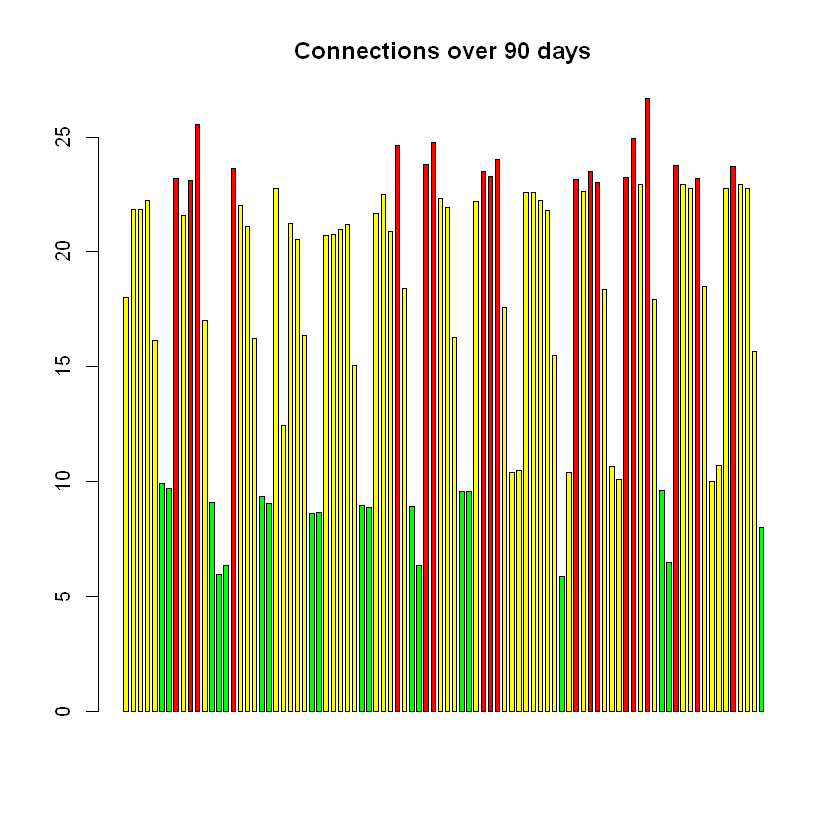

In [55]:
barplot(n_small, col=ifelse(n_small>=23, 'red', ifelse(10<n_small& n_small<23, 'yellow', 'green')), main="Connections over 90 days",
sub=cat("*Yellow represents normal days\n**Red represents busy days\n***Green represents quiet days"), space=0.6)